In [1]:
%run -i framework.py
%run -i real.py
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF
import xmltodict

## Read Data  
P.S. This step can be skipped for the second run.

In [2]:
with open('./Votes.xml') as fd:
    votes = xmltodict.parse(fd.read())
dfvotes = pd.DataFrame(votes['votes']['row'])
dfvotes.head()

,@Id,@PostId,@VoteTypeId,@CreationDate,@UserId,@BountyAmount
0,1,6,2,2012-02-14T00:00:00.000,NaN,NaN
1,2,1,2,2012-02-14T00:00:00.000,NaN,NaN
2,3,6,2,2012-02-14T00:00:00.000,NaN,NaN
3,4,3,2,2012-02-14T00:00:00.000,NaN,NaN
4,5,6,2,2012-02-14T00:00:00.000,NaN,NaN


In [3]:
with open('./Posts.xml') as fd2:
    posts = xmltodict.parse(fd2.read())

In [4]:
dfposts = pd.DataFrame(posts['posts']['row'])
dfposts['@Score'] = pd.to_numeric(dfposts['@Score'], errors='coerce')
dfposts['@ViewCount'] = pd.to_numeric(dfposts['@ViewCount'], errors='coerce')
dfposts['@AnswerCount'] = pd.to_numeric(dfposts['@AnswerCount'], errors='coerce')
dfposts['@CommentCount'] = pd.to_numeric(dfposts['@CommentCount'], errors='coerce')
dfposts['@FavoriteCount'] = pd.to_numeric(dfposts['@FavoriteCount'], errors='coerce')
dfposts.head()

,@Id,@PostTypeId,@AcceptedAnswerId,@CreationDate,@Score,@ViewCount,@Body,@OwnerUserId,@LastEditorUserId,@LastEditDate,...,@Tags,@AnswerCount,@CommentCount,@FavoriteCount,@ContentLicense,@ClosedDate,@ParentId,@OwnerDisplayName,@CommunityOwnedDate,@LastEditorDisplayName
0,1,1,180,2012-02-14T20:23:40.127,20,581.0,<p>As from title. What kind of visa class do I...,5,2700,2013-10-30T09:14:11.633,...,<job-search><visa><japan>,2.0,1,1.0,CC BY-SA 3.0,NaN,NaN,NaN,NaN,NaN
1,2,1,246,2012-02-14T20:26:22.683,11,821.0,<p>Which online resources are available for jo...,5,15723,2014-09-18T13:02:01.180,...,<phd><job-search><online-resource><chemistry>,2.0,2,NaN,CC BY-SA 3.0,2015-03-29T20:06:49.947,NaN,NaN,NaN,NaN
2,3,1,6,2012-02-14T20:27:41.980,48,5123.0,<p>As from title. Not all journals provide the...,5,38446,2016-03-11T14:56:14.233,...,<journals><bibliometrics><impact-factor>,4.0,1,18.0,CC BY-SA 3.0,NaN,NaN,NaN,NaN,NaN
3,4,1,145,2012-02-14T20:29:04.737,13,308.0,<p>I have seen many engineering departments wa...,18,15723,2014-09-18T13:02:31.710,...,<job-search><united-states><engineering>,2.0,0,1.0,CC BY-SA 3.0,NaN,NaN,NaN,NaN,NaN
4,5,1,9,2012-02-14T20:30:26.703,36,1150.0,"<p>What is the h-index, and how does it work ?...",5,99421,2019-01-24T15:18:25.270,...,<bibliometrics><methodology><ranking>,1.0,1,2.0,CC BY-SA 3.0,NaN,NaN,NaN,NaN,NaN


In [5]:
dfupvotes = dfvotes[dfvotes['@VoteTypeId']=='2'][['@PostId', '@VoteTypeId']]
dfupvotes_count = dfupvotes.groupby('@PostId').count().reset_index()
dfupvotes_count = dfupvotes_count.rename(columns = {'@VoteTypeId' : '@UpvoteCount'})
dfdownvotes = dfvotes[dfvotes['@VoteTypeId']=='3'][['@PostId', '@VoteTypeId']]
dfdownvotes_count = dfdownvotes.groupby('@PostId').count().reset_index()
dfdownvotes_count = dfdownvotes_count.rename(columns = {'@VoteTypeId' : '@DownvoteCount'})

dfpv = dfposts.set_index('@Id').join(dfupvotes_count.set_index('@PostId')).reset_index()
dfpv = dfpv.set_index('@Id').join(dfdownvotes_count.set_index('@PostId')).reset_index()
dfpv['@UpvoteCount'] = dfpv['@UpvoteCount'].fillna(0)
dfpv['@DownvoteCount'] = dfpv['@DownvoteCount'].fillna(0)
dfpv.head()

,@Id,@PostTypeId,@AcceptedAnswerId,@CreationDate,@Score,@ViewCount,@Body,@OwnerUserId,@LastEditorUserId,@LastEditDate,...,@CommentCount,@FavoriteCount,@ContentLicense,@ClosedDate,@ParentId,@OwnerDisplayName,@CommunityOwnedDate,@LastEditorDisplayName,@UpvoteCount,@DownvoteCount
0,1,1,180,2012-02-14T20:23:40.127,20,581.0,<p>As from title. What kind of visa class do I...,5,2700,2013-10-30T09:14:11.633,...,1,1.0,CC BY-SA 3.0,NaN,NaN,NaN,NaN,NaN,20.0,0.0
1,2,1,246,2012-02-14T20:26:22.683,11,821.0,<p>Which online resources are available for jo...,5,15723,2014-09-18T13:02:01.180,...,2,NaN,CC BY-SA 3.0,2015-03-29T20:06:49.947,NaN,NaN,NaN,NaN,11.0,0.0
2,3,1,6,2012-02-14T20:27:41.980,48,5123.0,<p>As from title. Not all journals provide the...,5,38446,2016-03-11T14:56:14.233,...,1,18.0,CC BY-SA 3.0,NaN,NaN,NaN,NaN,NaN,48.0,0.0
3,4,1,145,2012-02-14T20:29:04.737,13,308.0,<p>I have seen many engineering departments wa...,18,15723,2014-09-18T13:02:31.710,...,0,1.0,CC BY-SA 3.0,NaN,NaN,NaN,NaN,NaN,13.0,0.0
4,5,1,9,2012-02-14T20:30:26.703,36,1150.0,"<p>What is the h-index, and how does it work ?...",5,99421,2019-01-24T15:18:25.270,...,1,2.0,CC BY-SA 3.0,NaN,NaN,NaN,NaN,NaN,37.0,1.0


In [6]:
dfqa_upvote_count = dfpv[dfpv['@PostTypeId']=='2'][['@ParentId', '@UpvoteCount']]
dfqa_upvote_count = dfqa_upvote_count.groupby('@ParentId').sum()
dfqa_upvote_count = dfqa_upvote_count.reset_index().fillna(0)
dfqa_upvote_count = dfqa_upvote_count.rename(columns = {'@ParentId':'@Id_q', '@UpvoteCount':'@TotalUpvotes'})
dfqa_upvote_count.head(10)
dfqa_downvote_count = dfpv[dfpv['@PostTypeId']=='2'][['@ParentId', '@DownvoteCount']]
dfqa_downvote_count = dfqa_downvote_count.groupby('@ParentId').sum()
dfqa_downvote_count = dfqa_downvote_count.reset_index().fillna(0)
dfqa_downvote_count = dfqa_downvote_count.rename(columns = {'@ParentId':'@Id_q', '@DownvoteCount':'@TotalDownvotes'})
dfqa_downvote_count.head(10)

,@Id_q,@TotalDownvotes
0,1,0.0
1,100007,0.0
2,10001,0.0
3,100010,0.0
4,100013,0.0
5,100016,0.0
6,100017,0.0
7,100020,0.0
8,100022,1.0
9,100025,0.0


**Raw data with aggregated vote counts**  

In [7]:
dfa = dfpv[dfpv['@PostTypeId']=='2'][['@Id', '@ParentId', '@OwnerUserId', '@Score', '@UpvoteCount', '@DownvoteCount']]
dfq = dfpv[dfpv['@PostTypeId']=='1'][['@Id', '@OwnerUserId','@Score', '@ViewCount']]
dfqa = dfa.set_index('@ParentId').join(dfq.set_index('@Id'), lsuffix='_a', rsuffix='_q')
dfqa = dfqa.reset_index()
dfqa = dfqa.rename(columns = {'index' : '@Id_q', '@Id' : '@Id_a', '@Score': '@Score_a', '@ViewCount' : '@ViewCount_q'})
dfqa = dfqa.set_index('@Id_q').join(dfqa_upvote_count.set_index('@Id_q')).reset_index()
dfqa = dfqa.set_index('@Id_q').join(dfqa_downvote_count.set_index('@Id_q')).reset_index()
dfqa.head(11)
# dfqa.to_csv('stackex_full.csv', index=False)

,@Id_q,@Id_a,@OwnerUserId_a,@Score_a,@UpvoteCount,@DownvoteCount,@OwnerUserId_q,@Score_q,@ViewCount_q,@TotalUpvotes,@TotalDownvotes
0,1,180,NaN,7,7.0,0.0,5,20,581.0,8.0,0.0
1,1,142492,41071,1,1.0,0.0,5,20,581.0,8.0,0.0
2,100007,100080,15949,2,2.0,0.0,73961,3,864.0,2.0,0.0
3,10001,10002,96,12,12.0,0.0,7096,13,424.0,22.0,0.0
4,10001,10017,643,10,10.0,0.0,7096,13,424.0,22.0,0.0
5,100010,100015,9553,5,5.0,0.0,65825,2,247.0,5.0,0.0
6,100013,100014,929,9,9.0,0.0,57405,4,444.0,9.0,0.0
7,100016,100116,69460,1,1.0,0.0,14140,10,303.0,1.0,0.0
8,100017,100019,53,3,3.0,0.0,73492,0,151.0,3.0,0.0
9,100020,100052,19769,5,5.0,0.0,84044,9,224.0,5.0,0.0


In [8]:
dfqa.to_csv('stackex_full.csv', index=False)

In [9]:
dfqa = pd.read_csv('./stackex_full.csv') 
np.array(dfqa['@Id_q'].dropna(how='any').unique()).size

35218

In [10]:
np.array(dfqa['@Id_a'].dropna(how='any').unique()).size

88584

## Statistics to measure the performance of individual answer  
We only care about each user and its upvote/downvote counts per answer, regardless of the question.

In [11]:
# dfqa = pd.read_csv('./stackex_full.csv') 
df_stat = dfqa[['@OwnerUserId_a', '@UpvoteCount', '@DownvoteCount']]
df_stat = df_stat.assign(small_conservative = np.round((dfqa['@UpvoteCount']+2)/(dfqa['@UpvoteCount']+dfqa['@DownvoteCount']+10), decimals = 4))
df_stat = df_stat.assign(balanced = np.round((dfqa['@UpvoteCount']+10)/(dfqa['@UpvoteCount']+dfqa['@DownvoteCount']+20), decimals = 4))
df_stat = df_stat.assign(large_conservative = np.round((dfqa['@UpvoteCount']+8)/(dfqa['@UpvoteCount']+dfqa['@DownvoteCount']+40), decimals = 4))
df_stat = df_stat.rename(columns = {'small_conservative' : '(2, 8)',
                                    'large_conservative': '(8, 32)',
                                    'balanced': '(10, 10)'
                                       })
df_stat.head(10)

,@OwnerUserId_a,@UpvoteCount,@DownvoteCount,"(2, 8)","(10, 10)","(8, 32)"
0,NaN,7.0,0.0,0.5294,0.6296,0.3191
1,41071.0,1.0,0.0,0.2727,0.5238,0.2195
2,15949.0,2.0,0.0,0.3333,0.5455,0.2381
3,96.0,12.0,0.0,0.6364,0.6875,0.3846
4,643.0,10.0,0.0,0.6000,0.6667,0.3600
5,9553.0,5.0,0.0,0.4667,0.6000,0.2889
6,929.0,9.0,0.0,0.5789,0.6552,0.3469
7,69460.0,1.0,0.0,0.2727,0.5238,0.2195
8,53.0,3.0,0.0,0.3846,0.5652,0.2558
9,19769.0,5.0,0.0,0.4667,0.6000,0.2889


In [12]:
users = np.array(df_stat['@OwnerUserId_a'].dropna(how='any').unique())
num_users = users.size
data = np.array([np.array(df_stat[df_stat['@OwnerUserId_a']==user]['(2, 8)']) for user in users],dtype=object)
# discard some candidates
data_sizes = np.array([data[i].size for i in range(num_users)])
candidates = np.array([i for i in range(num_users) if data_sizes[i] >= 100])

In [13]:
import pickle5 as pickle
with open('candidates.pickle', 'wb') as f:
    pickle.dump(candidates, f)

In [14]:
df2 = df_stat[df_stat['@OwnerUserId_a'].isin(users[candidates])]
pairs = ['(2, 8)', '(8, 32)', '(10, 10)']

In [15]:
df2.to_csv('stackex_ECDF.csv', index=False)

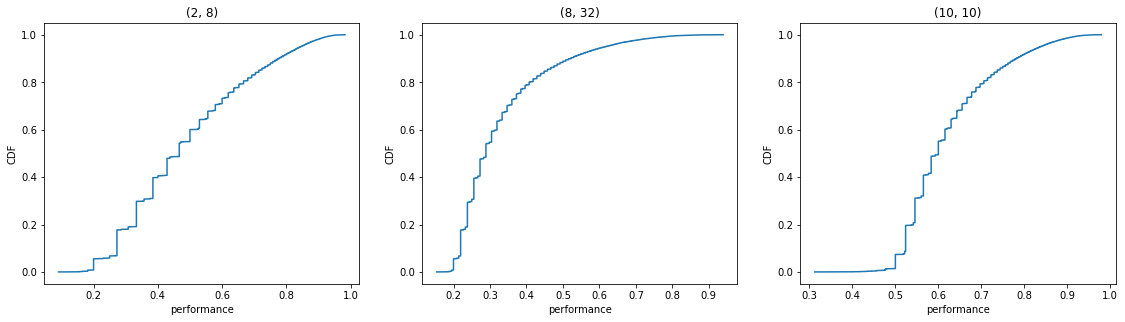

In [16]:
from itertools import product 
fig, axes = plt.subplots(1, 3, figsize = (6.4*3, 4.8*1))
axes[0].plot(ECDF(df2['(2, 8)']).x, ECDF(df2['(2, 8)']).y)
axes[1].plot(ECDF(df2['(8, 32)']).x, ECDF(df2['(8, 32)']).y)
axes[2].plot(ECDF(df2['(10, 10)']).x, ECDF(df2['(10, 10)']).y)
for i in range(3):
    axes[i].set_ylabel("CDF")
    axes[i].set_xlabel("performance")
    axes[i].set_title(pairs[i])
plt.show()

In [17]:
df_stat.to_csv('stackex.csv', index=False)
#df_stat = pd.read_csv('./stackex.csv') 

## Comparison Start  
We test set size $k=5$ and $k=10$ with sample size 100.  
We compare the results of our method with $\epsilon = 0.01$ and that of test scores.

In [18]:
def create_output_comp():
    column_labels_raw = ['obj','k','measure', 'test_number', 'ratio_TS', 'ratio_EB']
    df_raw = pd.DataFrame(columns=column_labels_raw)
    df_raw.to_csv('res_score_full.csv', index=False)

In [19]:
def run_comparison(n, k, pair, n_sample, samples_p, samples_q, obj, n_sets, set_items):
    df = pd.read_csv('./res_score_full.csv')
    
    value_P = get_value(n, n_sample, samples_p, obj, set_items)
    value_Q = get_value(n, n_sample, samples_q, obj, set_items)
    value_S = get_valueS(n, k, n_sample, samples_p, obj, set_items)
    
    for j in range(n_sets):    
        df = df.append({'obj': obj, 'k':k, 'measure': pair,
                        'test_number': j+1, 'ratio_EB': value_Q[j]/value_P[j],
                        'ratio_TS': value_S[j]/value_P[j]}, ignore_index = True)
    df.to_csv('res_score_full.csv', index=False)

In [20]:
create_output_comp()

In [21]:
n = len(candidates)
for pair in pairs:
    data = np.array([np.array(df_stat[df_stat['@OwnerUserId_a']==user][pair]) for user in users],dtype=object)
    samples_p = Real_sample(data, candidates, n_sample)
    samples_q = Discretized_real_sample(data, candidates, 0.01, n_sample)
    for k in kvals:
        set_items = get_sets(n, k, n_sets)
        for obj in objs:  
            run_comparison(n, k, pair, n_sample, samples_p, samples_q, obj, n_sets, set_items)   

In [26]:
def box_plot(k):
    df = pd.read_csv('./res_score_full.csv')
    fig, axes = plt.subplots(1, 3, figsize = (6.4*3, 4.8*1))
    flierprops = dict(marker='o', markeredgecolor='lightgrey')
    for i in range(3):
        current = df[(df['k'] == k)& (df['measure'] == pairs[i])]
        current.boxplot(ax = axes[i], column = 'ratio_EB', by = 'obj', flierprops = flierprops)
        axes[i].set_xlabel("objectives")
        axes[i].set_ylabel("$v(S)/u(S)$")
        axes[i].set_title('$(c_1, c_2)$: '+pairs[i])
        axes[i].set_ylim((0.5, 1.5)) 
    fig.suptitle('')  

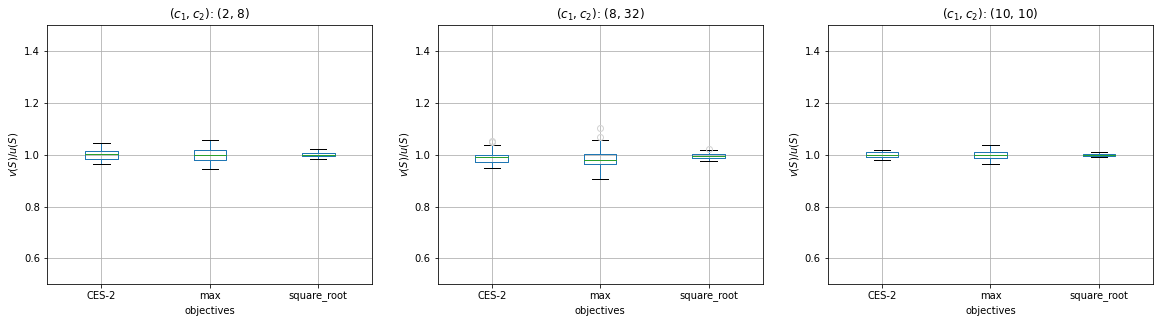

In [27]:
box_plot(5)

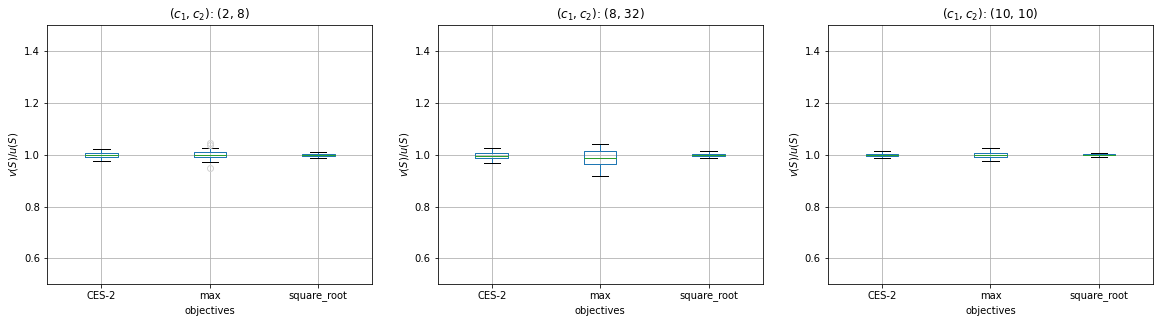

In [28]:
box_plot(10)